# 2.4.3 [Explanatory Power: Assumptions of Linear Regression](https://courses.thinkful.com/data-201v1/project/2.4.3)

In [3]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [46]:
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')

In [51]:
# Acquire, load, and preview the data.
data = pd.read_csv(
    'https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv').iloc[:,1:]
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,TV,Radio,Newspaper,Sales
0,230.100,37.800,69.200,22.100
1,44.500,39.300,45.100,10.400
2,17.200,45.900,69.300,9.300
3,151.500,41.300,58.500,18.500
4,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


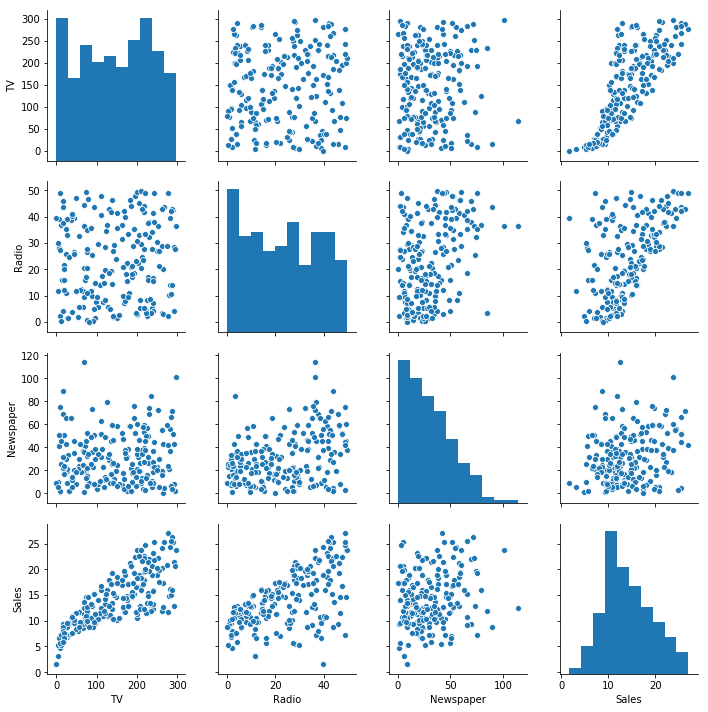

In [54]:
plt.Figure(figsize=(8,8))
sns.pairplot(data)
plt.show()

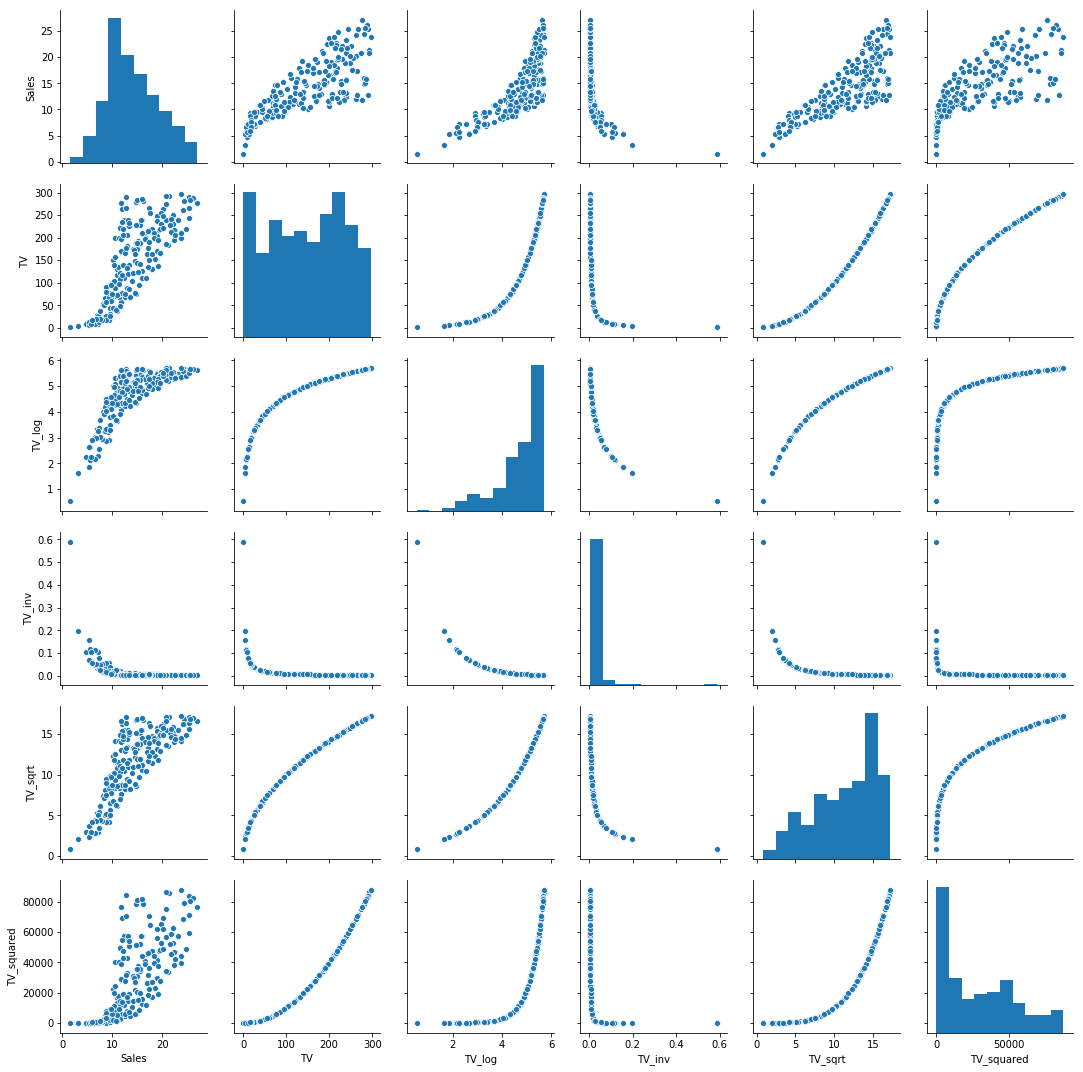

In [57]:
# TV looks like x squared is happening, trying the potential transformations from 50 ways to fix your data
data['TV_log']=np.log(data['TV']+1)

# For inverse version add 1 to avoid situations where dividing by 1 might happen
data['TV_inv']=1/(data['TV']+1)
data['TV_sqrt']=np.sqrt(data['TV'])
data['TV_squared']=data['TV']**2
# Plot
sns.pairplot(data[['Sales', 'TV', 'TV_log', 'TV_inv', 'TV_sqrt','TV_squared']])
plt.show()

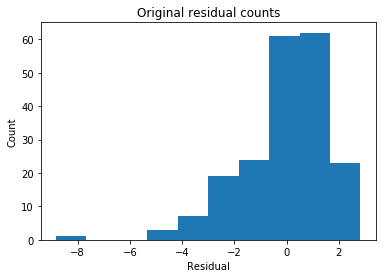

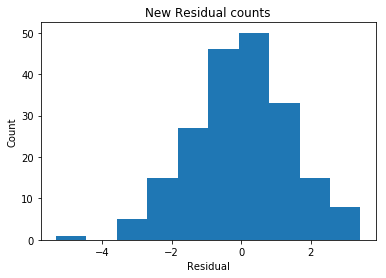


Coefficients: 
 [[ 9.74947557e-01  1.94767873e-01 -5.25277959e-04]]

Intercetp: 
 [-1.60927984]

R-squared:
0.9289549053811124


In [60]:
# TV sqrt helped a little. Try the model again with tv square root
regr2 = linear_model.LinearRegression()
X2 = data[['TV_sqrt', 'Radio', 'Newspaper']]
regr2.fit(X2, Y)

# Extract predicted Values.
predicted2 = regr2.predict(X2).ravel()

residual2 = actual - predicted2

plt.hist(residual)
plt.title('Original residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.hist(residual2)
plt.title('New Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

print('\nCoefficients: \n', regr2.coef_)
print('\nIntercetp: \n', regr2.intercept_)
print('\nR-squared:')
print(regr2.score(X2,Y))

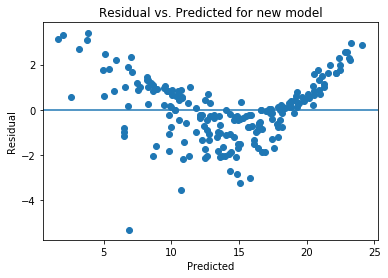

In [61]:
# That did more than i expected
# Check heteroskedasticity problem (the error distribution)
# Idont think it will bc heteroskedasticity is caused by multiple model groups being shoved into one model
plt.scatter(predicted2, residual2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted for new model')
plt.show()

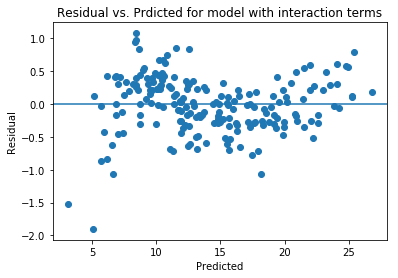


Coefficients: 
 [[ 4.52614520e-01 -6.16674646e-02  2.20660516e-02  9.21150799e-03
   1.23262983e-04 -8.90022605e-04]]

Intercept: 
 [4.33365659]

R-squared:
0.9931659646405621


In [65]:
# the range in sales when there is a high number of ads is much wider 
# than the range in sales when low number of ads
# the type of ads is definitely going to play a role, there may be a combination affect

data['TV_Radio'] = data['TV_sqrt']*data['Radio']
data['Newspaper_Radio'] = data['Newspaper']*data['Radio']
data['TV_Newspaper']= data['TV_sqrt']*data['Newspaper']

regr3 = linear_model.LinearRegression()
X3 = data[['TV_sqrt', 'Radio', 'TV_Radio', 'Newspaper', 
           'Newspaper_Radio', 'TV_Newspaper']]
regr3.fit(X3,Y)

# Extract predicted values.
predicted3 = regr3.predict(X3).ravel()

# Calculate the error akak residual.
residual3 = actual - predicted3

plt.scatter(predicted3, residual3)
plt.xlabel('Predicted')
plt.ylabel("Residual")
plt.axhline(y=0)
plt.title('Residual vs. Prdicted for model with interaction terms')
plt.show()
print('\nCoefficients: \n', regr3.coef_)
print('\nIntercept: \n', regr3.intercept_)
print('\nR-squared:')
print(regr3.score(X3,Y))


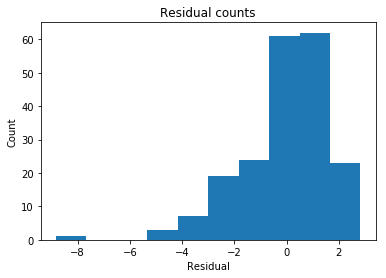

In [59]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

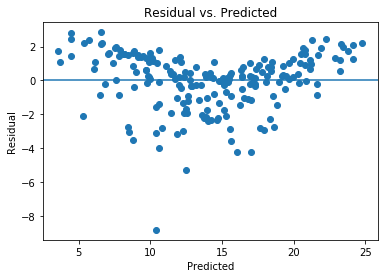

In [4]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

## Resolve Heteroscedasticity

In [ ]:
#Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

#Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

#Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

#Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

#Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

#Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

#Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)


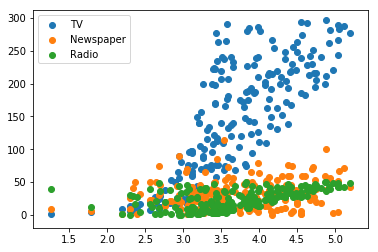

In [28]:
plt.scatter(np.sqrt(data.Sales), data.TV)
#plt.scatter(data.Sales, np.sqrt(data.TV), label='TV sqrt')
plt.scatter(np.sqrt(data.Sales), data.Newspaper)
plt.scatter(np.sqrt(data.Sales), data.Radio)
plt.legend(loc='upper left')

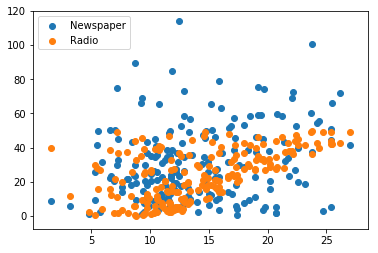

In [30]:
plt.scatter(data.Sales, np.sqrt(data.TV), label='TV sqrt')
plt.scatter(data.Sales, data.Newspaper)
plt.scatter(data.Sales, data.Radio)
plt.legend(loc='upper left')

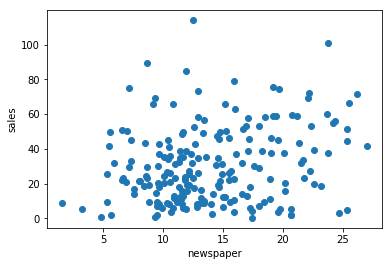

In [33]:
plt.scatter(data.Sales, data.Newspaper)
plt.ylabel('sales')
plt.xlabel('newspaper')
plt.show()

plt.scatter(data.Sales, data.Newspaper)
plt.ylabel('sales')
plt.xlabel('newspaper')
plt.show()

In [13]:
data['tv_sqrt'] = np.sqrt(data['TV'])

## Resolve Multivariate Non-Normality

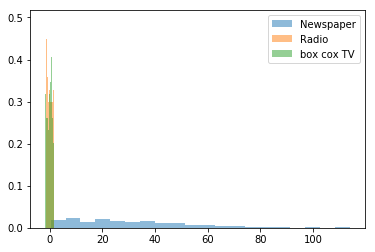

In [42]:

plt.hist(data.Newspaper, bins=20, alpha=.5,label='Newspaper',density=True)

plt.hist(preprocessing.scale(data.Radio), bins=20, alpha=.5,label='Radio', density=True)
#plt.hist(data.TV, bins=10, alpha=.5, label='TV',density=True)
#plt.hist(np.sqrt(data.TV), label='TV Sqrt', bins=20, alpha=.5, density=True)
plt.hist(preprocessing.scale(data.TV), bins= 20, alpha=.5, label='box cox TV', density=True)
plt.legend(loc='upper right')
plt.show()

([array([0.00626895, 0.01880685, 0.0250758 , 0.03134475, 0.06895844,
         0.11284108, 0.07522739, 0.05015159, 0.11284108, 0.14418583,
         0.10030319, 0.10657213, 0.10030319, 0.11284108, 0.07522739,
         0.04388264, 0.04388264, 0.0125379 , 0.00626895, 0.00626895]),
  array([0.        , 1.25378982, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ])],
 array([-0.94518092, -0.14759907,  0.64998278,  1.44756463,  2.24514648,
         3.04272833,  3.84031018,  4.63789203,  5.43547388,  6.23305572,
         7.03063757,  7.82821942,  8.62580127,  9.42338312, 10.22096497,
        11.01854682, 11.81612867, 12.61371052, 13.41129236, 14.20887421,
        15.00645606]),
 <a list of 2 Lists of Patches objects>)

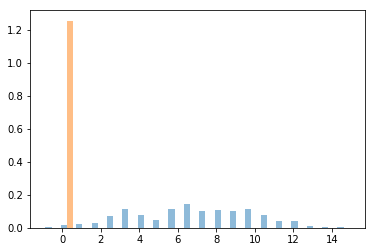

In [44]:
plt.hist(boxcox(data.Newspaper), bins=20, alpha=.5,label='Newspaper',density=True)


In [40]:
from sklearn import preprocessing
centered_scaled_data = preprocessing.scale(data.Radio)

In [34]:
from scipy.stats import boxcox
from scipy.stats import skew
boxcox_TV = boxcox(data.TV,)
from sklearn import preprocessing
centered_scaled_data = preprocessing.scale(original_data)
skness = skew(original_data)